In [173]:
from __future__ import division
from __future__ import print_function

import matplotlib
matplotlib.use('TkAgg') 
import numpy as np 
import pandas as pd 

import seaborn as sns
from matplotlib import pyplot as plt
sns.set_style("whitegrid")
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import os 
USER_DIR = os.path.expanduser('~')
DATA_DIR = os.path.join(USER_DIR, 'dev','comp','govhack18','data')
print(os.listdir(DATA_DIR))


['non-compliance-in-personal-insolvencies.csv']


In [174]:
INPUT_CSV = 'non-compliance-in-personal-insolvencies.csv'
fpath = os.path.join(DATA_DIR, INPUT_CSV)
print('fpath = ', fpath) 

fpath =  /home/jc138691/dev/comp/govhack18/data/non-compliance-in-personal-insolvencies.csv


In [175]:
df = pd.read_csv(fpath)
print(df.head())

   Unique ID  Calendar Year of Insolvency   SA3 of Debtor  SA3 Code of Debtor  \
0    3452750                         2010  South Canberra               80106   
1    3563908                         2011    Weston Creek               80108   
2    3252673                         2012     Tuggeranong               80107   
3    3610744                         2013     Tuggeranong               80107   
4    3610734                         2013     Tuggeranong               80107   

                GCCSA of Debtor GCCSA Code of Debtor  \
0  Australian Capital Territory                8ACTE   
1  Australian Capital Territory                8ACTE   
2  Australian Capital Territory                8ACTE   
3  Australian Capital Territory                8ACTE   
4  Australian Capital Territory                8ACTE   

                State of Debtor Sex of Debtor           Family Situation  \
0  Australian Capital Territory        Female     Single with Dependants   
1  Australian Capital Te

In [176]:
print('df.columns = ', df.columns)
print(df.keys())

df.columns =  Index([u'Unique ID', u'Calendar Year of Insolvency', u'SA3 of Debtor',
       u'SA3 Code of Debtor', u'GCCSA of Debtor', u'GCCSA Code of Debtor',
       u'State of Debtor', u'Sex of Debtor', u'Family Situation',
       u'Debtor Occupation Code (ANZSCO)', u'Debtor Occupation Name (ANZSCO)',
       u'Main Cause of Insolvency', u'Business Related Insolvency',
       u'Debtor Income', u'Primary Income Source', u'Unsecured Debts',
       u'Value of Assets', u'Type of Party', u'Non-Compliance Type',
       u'Result of Non-Compliance', u'Number of Instances',
       u'Outcome of Non-Compliance', u'Non-Compliance Conviction Result'],
      dtype='object')
Index([u'Unique ID', u'Calendar Year of Insolvency', u'SA3 of Debtor',
       u'SA3 Code of Debtor', u'GCCSA of Debtor', u'GCCSA Code of Debtor',
       u'State of Debtor', u'Sex of Debtor', u'Family Situation',
       u'Debtor Occupation Code (ANZSCO)', u'Debtor Occupation Name (ANZSCO)',
       u'Main Cause of Insolvency', u'B

In [177]:
df = df.drop(labels = ['Debtor Occupation Name (ANZSCO)'], axis = 1)
print('df.columns = ', df.columns)


df.columns =  Index([u'Unique ID', u'Calendar Year of Insolvency', u'SA3 of Debtor',
       u'SA3 Code of Debtor', u'GCCSA of Debtor', u'GCCSA Code of Debtor',
       u'State of Debtor', u'Sex of Debtor', u'Family Situation',
       u'Debtor Occupation Code (ANZSCO)', u'Main Cause of Insolvency',
       u'Business Related Insolvency', u'Debtor Income',
       u'Primary Income Source', u'Unsecured Debts', u'Value of Assets',
       u'Type of Party', u'Non-Compliance Type', u'Result of Non-Compliance',
       u'Number of Instances', u'Outcome of Non-Compliance',
       u'Non-Compliance Conviction Result'],
      dtype='object')


In [178]:
col_name = 'Debtor Occupation Code (ANZSCO)'
df[col_name].fillna(0, inplace=True)
# df[col_name] = (df[col_name] / 10.).astype(int)
df[col_name] = (df[col_name] / 10.).apply(np.floor).astype(int)
print(df.head())


   Unique ID  Calendar Year of Insolvency   SA3 of Debtor  SA3 Code of Debtor  \
0    3452750                         2010  South Canberra               80106   
1    3563908                         2011    Weston Creek               80108   
2    3252673                         2012     Tuggeranong               80107   
3    3610744                         2013     Tuggeranong               80107   
4    3610734                         2013     Tuggeranong               80107   

                GCCSA of Debtor GCCSA Code of Debtor  \
0  Australian Capital Territory                8ACTE   
1  Australian Capital Territory                8ACTE   
2  Australian Capital Territory                8ACTE   
3  Australian Capital Territory                8ACTE   
4  Australian Capital Territory                8ACTE   

                State of Debtor Sex of Debtor           Family Situation  \
0  Australian Capital Territory        Female     Single with Dependants   
1  Australian Capital Te

In [179]:
types_df = df.dtypes
num_values = types_df[(types_df == float)]
print("These are the numerical features:")
print(num_values)


In [180]:
print(df.describe())

          Unique ID  Calendar Year of Insolvency  SA3 Code of Debtor  \
count  3.565000e+05                356500.000000       356500.000000   
mean   3.617463e+06                  2012.335195        26240.855436   
std    2.858009e+05                     3.228209        15011.277165   
min   -1.000000e+00                  2007.000000            0.000000   
25%    3.470463e+06                  2010.000000        12301.000000   
50%    3.610774e+06                  2012.000000        21305.000000   
75%    3.842801e+06                  2015.000000        31503.000000   
max    4.190636e+06                  2018.000000        80111.000000   

       Debtor Occupation Code (ANZSCO)  Number of Instances  
count                    356500.000000         14892.000000  
mean                          4.871408             0.667002  
std                           2.711526             0.978984  
min                           0.000000             0.000000  
25%                           3.000000   

In [181]:
def null_table(df):
    print(" Data Frame")
    print(pd.isnull(df).sum()) 
    print(" ")

null_table(df)

 Data Frame


Unique ID                                0
Calendar Year of Insolvency              0
SA3 of Debtor                            0
SA3 Code of Debtor                       0
GCCSA of Debtor                          0
GCCSA Code of Debtor                     0
State of Debtor                          0
Sex of Debtor                            0
Family Situation                         0
Debtor Occupation Code (ANZSCO)          0
Main Cause of Insolvency                 0
Business Related Insolvency              0
Debtor Income                            0
Primary Income Source                    0
Unsecured Debts                          0
Value of Assets                          0
Type of Party                       341629
Non-Compliance Type                 341608
Result of Non-Compliance            342306
Number of Instances                 341608
Outcome of Non-Compliance           345672
Non-Compliance Conviction Result    352942
dtype: int64
 


In [182]:
print(df.nunique())

Unique ID                           356500
Calendar Year of Insolvency             12
SA3 of Debtor                          343
SA3 Code of Debtor                     343
GCCSA of Debtor                         25
GCCSA Code of Debtor                    25
State of Debtor                         10
Sex of Debtor                            4
Family Situation                         6
Debtor Occupation Code (ANZSCO)         10
Main Cause of Insolvency                23
Business Related Insolvency              3
Debtor Income                            7
Primary Income Source                   11
Unsecured Debts                         21
Value of Assets                         21
Type of Party                           13
Non-Compliance Type                      7
Result of Non-Compliance                17
Number of Instances                     21
Outcome of Non-Compliance              164
Non-Compliance Conviction Result         8
dtype: int64


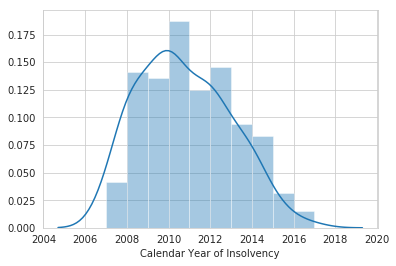

In [183]:
df2 = df.copy()
df2.dropna(inplace = True)
sns.distplot(df2["Calendar Year of Insolvency"])

In [184]:
print(df['Non-Compliance Type'].unique())
IGNORE_TYPE = 'Inspection Error'
df = df.replace([IGNORE_TYPE], ['']) 
# print(df.head())
print(df['Non-Compliance Type'].unique())

[nan 'Offence Referral' 'Info Request' 'Objection to Discharge'
 'Inspection Error' 'Complaint' 'AER Info Request' 'Other']


[nan 'Offence Referral' 'Info Request' 'Objection to Discharge' ''
 'Complaint' 'AER Info Request' 'Other']


In [185]:
print(df['Sex of Debtor'].unique())
df = df.replace(['Not Stated'], ['Unknown'])
print(df['Sex of Debtor'].unique())


['Female' 'Male' 'Not Stated' 'Unknown']


['Female' 'Male' 'Unknown']


   Unique ID  Calendar Year of Insolvency   SA3 of Debtor  SA3 Code of Debtor  \
0    3452750                         2010  South Canberra               80106   
1    3563908                         2011    Weston Creek               80108   
2    3252673                         2012     Tuggeranong               80107   
3    3610744                         2013     Tuggeranong               80107   
4    3610734                         2013     Tuggeranong               80107   

                GCCSA of Debtor GCCSA Code of Debtor  \
0  Australian Capital Territory                8ACTE   
1  Australian Capital Territory                8ACTE   
2  Australian Capital Territory                8ACTE   
3  Australian Capital Territory                8ACTE   
4  Australian Capital Territory                8ACTE   

                State of Debtor Sex of Debtor           Family Situation  \
0  Australian Capital Territory        Female     Single with Dependants   
1  Australian Capital Te

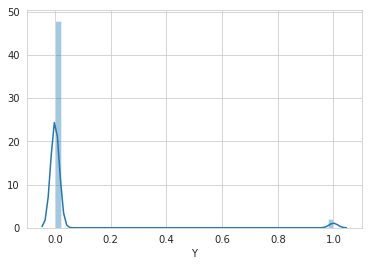

In [186]:
NON_COMP_COLS = ['Non-Compliance Type', 'Result of Non-Compliance', 
                 'Number of Instances', 'Outcome of Non-Compliance', 'Non-Compliance Conviction Result']
df2 = df.copy()
df['Y'] = (~df2[NON_COMP_COLS].isnull()).sum(axis=1)
df['Y'] = (df['Y'] > 0).astype(int)
print(df.head())

sns.distplot(df["Y"])

In [187]:
df = df.drop(labels = NON_COMP_COLS, axis = 1)
print('df.columns = ', df.columns)
IGNORE_COLS = ['GCCSA of Debtor','SA3 Code of Debtor', 'SA3 of Debtor']
df = df.drop(labels = IGNORE_COLS, axis = 1)
print('df.columns = ', df.columns)

print(df.nunique())

df.columns =  Index([u'Unique ID', u'Calendar Year of Insolvency', u'SA3 of Debtor',
       u'SA3 Code of Debtor', u'GCCSA of Debtor', u'GCCSA Code of Debtor',
       u'State of Debtor', u'Sex of Debtor', u'Family Situation',
       u'Debtor Occupation Code (ANZSCO)', u'Main Cause of Insolvency',
       u'Business Related Insolvency', u'Debtor Income',
       u'Primary Income Source', u'Unsecured Debts', u'Value of Assets',
       u'Type of Party', u'Y'],
      dtype='object')
df.columns =  Index([u'Unique ID', u'Calendar Year of Insolvency', u'GCCSA Code of Debtor',
       u'State of Debtor', u'Sex of Debtor', u'Family Situation',
       u'Debtor Occupation Code (ANZSCO)', u'Main Cause of Insolvency',
       u'Business Related Insolvency', u'Debtor Income',
       u'Primary Income Source', u'Unsecured Debts', u'Value of Assets',
       u'Type of Party', u'Y'],
      dtype='object')


Unique ID                          356500
Calendar Year of Insolvency            12
GCCSA Code of Debtor                   25
State of Debtor                        10
Sex of Debtor                           3
Family Situation                        5
Debtor Occupation Code (ANZSCO)        10
Main Cause of Insolvency               22
Business Related Insolvency             3
Debtor Income                           7
Primary Income Source                  11
Unsecured Debts                        21
Value of Assets                        21
Type of Party                          13
Y                                       2
dtype: int64


In [189]:
out_path = os.path.join(DATA_DIR, 'train_8_1500.csv')
df.to_csv(out_path, index=False)